In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud
#이는 IPython 에서 제공하는 Rich output 에 대한 표현 방식
#%matplotlib inline #이 문구는 주피터에서만 되기 때문에 아래의 문구로 대체한다.

In [3]:
DATA_IN_PATH = '../data/' #데이터가 존재하는 파일 경로
print("file size : ")
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file:
        print(file.ljust(30)+str(round(os.path.getsize(DATA_IN_PATH+file)/ 1000000, 2))+'MB')

train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header = 0, delimiter = '\t',quoting=3)
print(train_data.head())
print("total number of training data : {}".format(len(train_data)))
train_length = train_data['document'].astype(str).apply(len) #각 데이터에 대한 길이 값 추출
print(train_length.head())

file size : 
ratings.txt                   19.72MB
ratings_test.txt              4.94MB
ratings_train.txt             14.78MB
         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
total number of training data : 150000
0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64


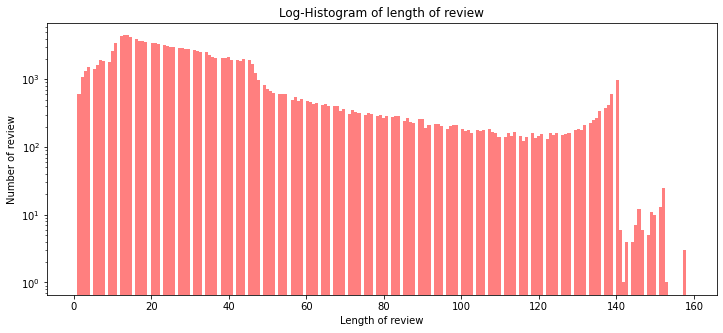

In [4]:
#drawing histogram 전체 데이터에 대해 길이에 대한 히스토그램을 그린다.
plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')
plt.show()

In [5]:
#웃긴 부분: 위의 히스토그램을 보면 20자 이하 부근에서 많이 분포되어 있다가 
#길이가 길어질수록 점점 수가 줄어들다가 갑자기? 
#140자 부근에서 급증
#==>140자 제한 걸려있어서 그럼ㅋㅋ
#최대 글자수가 140자 제한이지만 특수문자 등으로 좀 더 긺
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최tht값: {}'.format(np.min(train_length)))

리뷰 길이 최댓값: 158
리뷰 길이 최tht값: 1


{'whiskers': [<matplotlib.lines.Line2D at 0x26190a15f60>,
 'caps': [<matplotlib.lines.Line2D at 0x26190a1e550>,
 'boxes': [<matplotlib.lines.Line2D at 0x26190a15cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x26190a1eb00>],
 'fliers': [<matplotlib.lines.Line2D at 0x26190a2c048>],
 'means': [<matplotlib.lines.Line2D at 0x26190a1edd8>]}

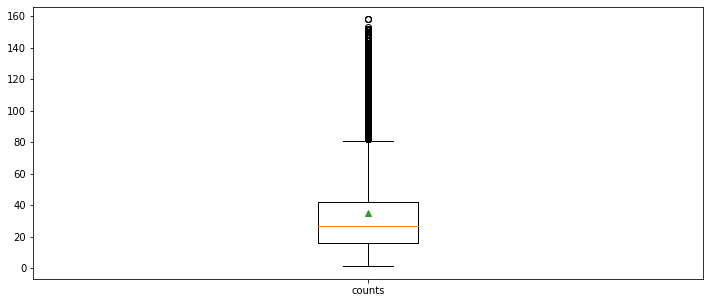

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

<function matplotlib.pyplot.show(close=None, block=None)>

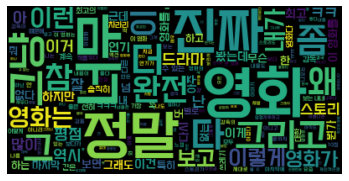

In [8]:
from wordcloud import WordCloud
#어휘빈도분석 start
train_review = [review for review in train_data['document'] if type(review) is str]
#워드 클라우드
wordcloud = WordCloud(font_path=DATA_IN_PATH+'font_youspotlight.ttf').generate(''.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

c:\users\gksdb\anaconda3\envs\ilovenlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

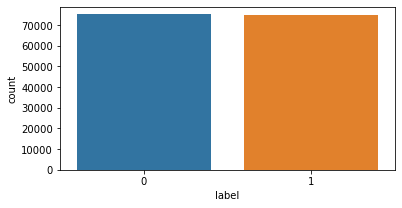

In [9]:
#라벨값 비율 확인
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['label'])

In [12]:
#각 리뷰의 단어 수 확인
train_word_counts=train_data['document'].astype(str).apply(lambda x:len(x.split(' ')))
print(train_word_counts)
print("리뷰 단어 개수 최댓값 : {}".format(np.max(train_word_counts)))
print("리뷰 단어 개수 최솟값 : {}".format(np.min(train_word_counts)))
print("리뷰 단어 개수 평균값 : {:.2f}".format(np.mean(train_word_counts)))

0          5
1          4
2          1
3          6
4         11
          ..
149995     4
149996     3
149997     7
149998     6
149999     7
Name: document, Length: 150000, dtype: int64
리뷰 단어 개수 최댓값 : 41
리뷰 단어 개수 최솟값 : 1
리뷰 단어 개수 평균값 : 7.58


In [15]:
#특수문자
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x))
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x))

print("물음표가 있는 document들 : {:.2f}%".format(qmarks*100))
print("마침표가 있는 document들 : {:.2f}%".format(fullstop*100))

물음표가 있는 document들 : 8.25%
마침표가 있는 document들 : 51.76%
